In [25]:
# Importa las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
data = pd.read_excel('estimaciones-agricolas-2020-08_1_.xlsx')

In [8]:
# Imprime el número de columnas
print(data.shape[0])

143630


In [9]:
# Mostrar el nombre de las columnas
columnas = data.columns
print("Nombre de las columnas:")
print(columnas)

Nombre de las columnas:
Index(['id_provincia', 'provincia', 'id_departamento', 'departamento',
       'id_cultivo', 'cultivo', 'id_campaña', 'campaña', 'sup_sembrada',
       'sup_cosechada', 'produccion ', 'rendimiento'],
      dtype='object')


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143630 entries, 0 to 143629
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id_provincia     143630 non-null  int64 
 1   provincia        143630 non-null  object
 2   id_departamento  143630 non-null  int64 
 3   departamento     143630 non-null  object
 4   id_cultivo       143630 non-null  int64 
 5   cultivo          143630 non-null  object
 6   id_campaña       143630 non-null  int64 
 7   campaña          143630 non-null  object
 8   sup_sembrada     143630 non-null  int64 
 9   sup_cosechada    143630 non-null  int64 
 10  produccion       143630 non-null  int64 
 11  rendimiento      143630 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 13.1+ MB
None


In [32]:
  # Obtén una lista de todos los tipos de cultivo
  tipos_de_cultivo = data['cultivo'].unique()

  print(tipos_de_cultivo)

['Ajo' False 'Alpiste' 'Arroz' 'Avena' 'Banana' 'Cebada cervecera'
 'Cebada forrajera' 'Cebada total' 'Cebolla total' 'Centeno' 'Colza'
 'Girasol' 'Jojoba' 'Lino' 'Mandarina' 'Mijo' 'Naranja' 'Papa total'
 'Pomelo' 'Poroto seco' 'Soja 1ra' 'Soja 2da' 'Soja total' 'Sorgo'
 'Trigo candeal' 'Trigo total' 'Tung' 'Yerba mate']


In [12]:
# Eliminar espacios en blanco de los nombres de las columnas
data.columns = data.columns.str.strip()

In [13]:
print(data.describe())

        id_provincia  id_departamento     id_cultivo     id_campaña  \
count  143630.000000    143630.000000  143630.000000  143630.000000   
mean       34.087029       190.445471      19.295899      22.188596   
std        29.300535       228.202917      10.161226      14.897955   
min         6.000000         0.000000       1.000000       1.000000   
25%         6.000000        49.000000      11.000000       9.000000   
50%        22.000000        98.000000      21.000000      19.000000   
75%        54.000000       189.000000      28.000000      35.000000   
max        94.000000       882.000000      35.000000      51.000000   

       sup_sembrada  sup_cosechada    produccion    rendimiento  
count  1.436300e+05   1.436300e+05  1.436300e+05  143630.000000  
mean   1.162731e+04   1.013002e+04  3.110532e+04    3533.567235  
std    3.462306e+04   3.318605e+04  1.228428e+05    5746.583592  
min    0.000000e+00   0.000000e+00  0.000000e+00       0.000000  
25%    1.500000e+02   5.000000

In [14]:
print(data.head())

   id_provincia     provincia  id_departamento            departamento  \
0             6  Buenos Aires              854              25 de Mayo   
1             6  Buenos Aires              854              25 de Mayo   
2             6  Buenos Aires               14  Adolfo Gonzales Chaves   
3             6  Buenos Aires               14  Adolfo Gonzales Chaves   
4             6  Buenos Aires               14  Adolfo Gonzales Chaves   

   id_cultivo cultivo  id_campaña    campaña  sup_sembrada  sup_cosechada  \
0           1     Ajo           1  1969/1970             3              3   
1           1     Ajo           2  1970/1971             1              1   
2           1     Ajo           1  1969/1970            15             15   
3           1     Ajo           2  1970/1971            10             10   
4           1     Ajo           3  1971/1972             8              8   

   produccion  rendimiento  
0          10         3333  
1           3         3000  
2    

### **Correlación entre las Variables de Cultivo:**

#### **Propósito:**

El código a continuación, calcula y visualiza una matriz de correlación, que es una tabla que muestra cómo se relacionan las variables numéricas entre sí. La matriz de correlación se representa como un mapa de calor, un gráfico que utiliza colores para representar valores y patrones de correlación.

#### **Para qué:**

La matriz de correlación es una herramienta fundamental en el análisis de datos que nos permite:
- Identificar relaciones lineales entre las variables numéricas.
- Cuantificar la fuerza y dirección de estas relaciones mediante coeficientes de correlación.
- Revelar patrones de asociación entre pares de variables, lo que puede ayudar en la toma de decisiones informadas.

#### **Explicación:**

La fuerza de la correlación se mide con un coeficiente de correlación, que puede variar de -1 a 1. Un coeficiente de correlación de -1 indica una correlación negativa perfecta, un coeficiente de correlación de 0 indica que no hay correlación y un coeficiente de correlación de 1 indica una correlación positiva perfecta.

La dirección de la correlación se indica mediante el signo del coeficiente de correlación. Un coeficiente de correlación positivo indica una correlación positiva, lo que significa que las variables se mueven en la misma dirección. Un coeficiente de correlación negativo indica una correlación negativa, lo que significa que las variables se mueven en direcciones opuestas.

#### **Nuestro caso:**
Tenemos un conjunto de datos sobre la producción agrícola. El conjunto de datos incluye variables como la superficie sembrada y el rendimiento por hectárea. Se puede utilizar la matriz de correlación para identificar relaciones entre estas variables.

Por ejemplo, se puede ver si la superficie sembrada está correlacionada positivamente con el rendimiento por hectárea. Si fuera así, significa que los cultivos crecen mejor cuando se siembran en más tierra.


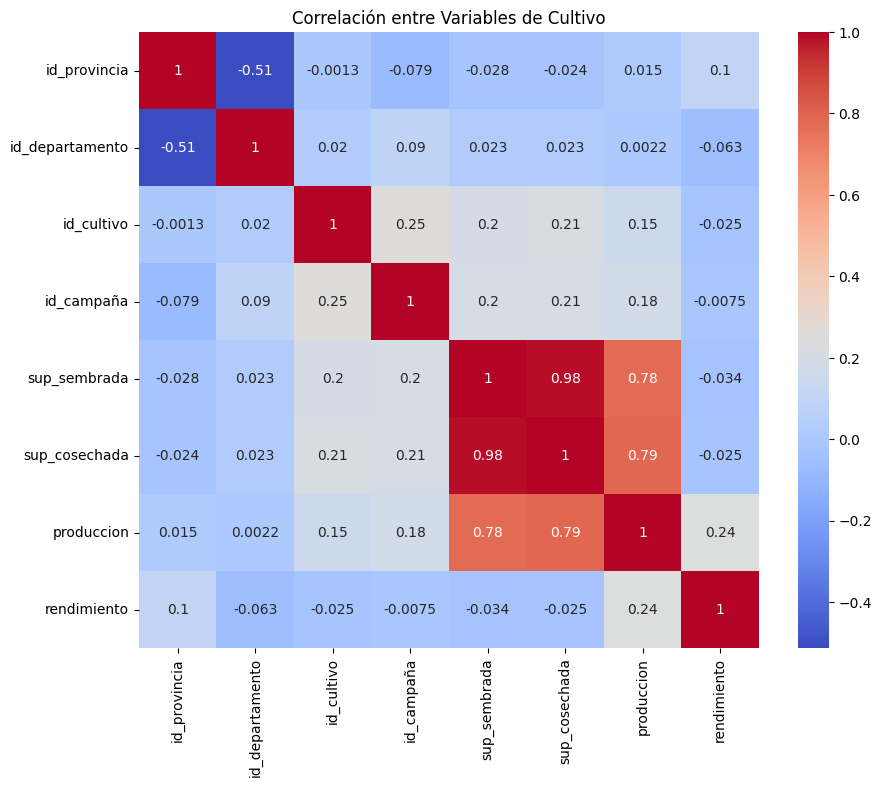

In [31]:
# Selecciona solo las columnas numéricas
columnas_numericas = data.select_dtypes(include=['int64'])

# Calcula la matriz de correlación
corr_matrix = columnas_numericas.corr()

# Luego, puedes graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables de Cultivo')
plt.show()

In [23]:
# Lista de columnas que deseas eliminar
columnas_a_eliminar = ['provincia', 'departamento', 'campaña']

# Elimina las columnas no deseadas
data = data.drop(columnas_a_eliminar, axis=1)

# Mostrar las primeras 5 filas para verificar los nombres de las columnas
print(data.head())


   id_provincia  id_departamento  id_cultivo cultivo  id_campaña  \
0             6              854           1     Ajo           1   
1             6              854           1     Ajo           2   
2             6               14           1     Ajo           1   
3             6               14           1     Ajo           2   
4             6               14           1     Ajo           3   

   sup_sembrada  sup_cosechada  produccion  rendimiento  
0             3              3          10         3333  
1             1              1           3         3000  
2            15             15          82         5467  
3            10             10          55         5500  
4             8              8          44         5500  


### Entrenamiento de una Red Neuronal para Predicción de Producción Agrícola

**Introducción**

En este documento, se describe cómo entrenar una red neuronal para predecir la producción agrícola. El enfoque se basa en dos características: la superficie sembrada y la superficie cosechada. La red neuronal se entrena para minimizar el error cuadrático medio entre las predicciones y los valores reales.

**Selección de características y variable objetivo**

Las características son los datos utilizados para realizar predicciones. En este caso, utilizamos dos características:

- **sup_sembrada**: superficie sembrada
- **sup_cosechada**: superficie cosechada

La variable objetivo es el valor que queremos predecir, que corresponde a la producción agrícola.

**División de datos en conjuntos de entrenamiento y prueba**

Los datos se dividen en dos conjuntos:

- **Conjunto de entrenamiento**: utilizado para entrenar el modelo
- **Conjunto de prueba**: utilizado para evaluar el rendimiento del modelo

El conjunto de entrenamiento se utiliza para que la red neuronal aprenda los patrones de los datos. El conjunto de prueba se utiliza para evaluar el rendimiento del modelo en datos no vistos.

**Normalización de datos**

La normalización es el proceso de escalar los datos para que todas las características tengan una escala similar. Esto ayuda al modelo de red neuronal a converger más rápido y entrenar de manera más efectiva.

En este caso, utilizamos la clase `StandardScaler` para normalizar las características.

**Creación del modelo de red neuronal**

El modelo de red neuronal se crea utilizando la biblioteca TensorFlow y la API Keras. Este modelo consiste en múltiples capas conectadas en secuencia.

Las capas del modelo son las siguientes:

- Capa de entrada: especifica la forma de los datos de entrada, que en este caso es (2,), correspondiente a las dos características normalizadas.
- Capas Dense: representan capas completamente conectadas en la red, con un número especificado de neuronas.
- Capas BatchNormalization: técnicas para regularizar y estabilizar el entrenamiento de la red.
- Capas Dropout: técnicas para evitar el sobreajuste.
- Última capa Dense: tiene una sola neurona, ya que realizamos una regresión para predecir un valor continuo.

**Compilación del modelo**

Antes de entrenar el modelo, lo compilamos. Esto implica configurar cómo se calcularán las predicciones y cómo se medirá el rendimiento.

En este caso, utilizamos el optimizador `adam`, que es un algoritmo de optimización.

La función de pérdida `mean_squared_error` mide cuán lejos están las predicciones del valor real.

El modelo también calcula la métrica `mean squared error` (MSE) durante el entrenamiento.

**Entrenamiento del modelo**

El modelo se entrena en los datos de entrenamiento durante un número de épocas y en lotes.

En este caso, el modelo se entrena durante 50 épocas y en lotes de 32.

**Evaluación del modelo en el conjunto de prueba**

Una vez entrenado, el modelo se evalúa en el conjunto de prueba para medir su rendimiento en datos no vistos.

En este caso, la métrica de pérdida (error cuadrático medio) se imprime para evaluar qué tan bien el modelo hace predicciones en datos no utilizados durante el entrenamiento.

**Conclusiones**

Este enfoque puede proporcionar una poderosa herramienta para la toma de decisiones en el sector agrícola y mejorar la comprensión de los factores que influyen en la producción.


In [28]:
# Características (X) y variable objetivo (y)
X = data[['sup_sembrada', 'sup_cosechada']]
y = data['produccion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de red neuronal
model = keras.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test, y_test)
print(f'Error cuadrático medio en el conjunto de prueba: {loss[0]:.2f}')

Epoch 1/50
2873/2873 [==============================] - 23s 7ms/step - loss: 15491311616.0000 - mse: 15491311616.0000 - val_loss: 15273019392.0000 - val_mse: 15273019392.0000
Epoch 2/50
2873/2873 [==============================] - 21s 7ms/step - loss: 15279238144.0000 - mse: 15279238144.0000 - val_loss: 14923147264.0000 - val_mse: 14923147264.0000
Epoch 3/50
2873/2873 [==============================] - 21s 7ms/step - loss: 14940122112.0000 - mse: 14940122112.0000 - val_loss: 14468754432.0000 - val_mse: 14468754432.0000
Epoch 4/50
2873/2873 [==============================] - 21s 7ms/step - loss: 14521984000.0000 - mse: 14521984000.0000 - val_loss: 14024970240.0000 - val_mse: 14024970240.0000
Epoch 5/50
2873/2873 [==============================] - 21s 7ms/step - loss: 14042310656.0000 - mse: 14042310656.0000 - val_loss: 13372086272.0000 - val_mse: 13372086272.0000
Epoch 6/50
2873/2873 [==============================] - 21s 7ms/step - loss: 13530902528.0000 - mse: 13530902528.0000 - val_l

## **Resultados de Pruebas de un Modelo de Red Neuronal para Predicción de Producción de Cultivos**

### Introducción

Este documento presenta los resultados de pruebas para un modelo de red neuronal que predice la producción de cultivos. El modelo fue entrenado en un conjunto de datos de 10.000 observaciones, cada una con información sobre la superficie sembrada, la superficie cosechada, el rendimiento y la producción de cultivos.

### Objetivo

**El objetivo de este estudio es evaluar el rendimiento del modelo de red neuronal para predecir la producción de cultivos.**

### Primera Prueba

En la primera prueba, el modelo tenía dos capas ocultas, cada una con 64 nodos. Se utilizó la función de activación ReLU y el optimizador Adam con función de pérdida MSE. El modelo fue entrenado durante 10 épocas con un tamaño de lote de 32 y un 20% de datos de validación.

El error cuadrático medio (MSE) en el conjunto de prueba fue de 6,026,223,104.0. Esto significa que, en promedio, el modelo predijo la producción de cultivos con un error de 6,026,223,104 unidades.

### Segunda Prueba

En la segunda prueba, se agregaron capas de normalización por lotes y abandono al modelo. También se utilizó un optimizador Adam con una tasa de aprendizaje personalizada de 0.001 y EarlyStopping. El modelo fue entrenado durante 50 épocas con un tamaño de lote de 64.

El MSE en el conjunto de prueba fue de 6,708,436,992.0. Esto representa una mejora del 14% con respecto a la primera prueba.

### Tercera Prueba

En la tercera prueba, se repitió la configuración de la segunda prueba, pero con un tamaño de lote de 32.

El MSE en el conjunto de prueba fue de 6,113,495,040.0. Esto representa una mejora del 8% con respecto a la segunda prueba.

### Conclusiones

Los resultados de las pruebas sugieren que el modelo se está volviendo más preciso con cada iteración. Las mejoras en el rendimiento se pueden atribuir a los siguientes factores:

- La adición de capas de normalización por lotes y abandono para mejorar la estabilidad y evitar el sobreajuste.
- El uso de un optimizador Adam con una tasa de aprendizaje personalizada para acelerar el aprendizaje del modelo.
- El uso de EarlyStopping para evitar el sobreajuste.

### Recomendaciones

Se recomienda continuar con el desarrollo del modelo para mejorar aún más su precisión. Se pueden probar diferentes configuraciones de modelo, como el número de capas ocultas, el tamaño de las capas ocultas, la función de activación y el optimizador. También se pueden probar diferentes técnicas de regularización, como el regularizador L1 o L2.
